In [1]:
# setup + imports
%matplotlib inline
%config InlineBackend.figure_format='retina'

import astropy.units as u
import astropy.coordinates as coord
import numpy as np
import seaborn as sns
sns.set(style='white', font_scale=1.2)

## If you are looking towards RA=0, Dec=0, at a sample of halo stars with M<sub>r</sub>=5 and r = 21:

### a) what is their heliocentric distance?

In [2]:
distance = coord.Distance(distmod=(21 - 5))
distance

<Distance 15.848931924611142 kpc>

### b) what is their galactocentric distance?

In [3]:
c = coord.ICRS(ra=0*u.degree, dec=0*u.degree, distance=distance)
c_gal = c.transform_to(coord.Galactocentric)
c_gal.representation = 'spherical'
c_gal.distance

<Distance 18.289766451276456 kpc>

### c) what is the median and rms for their observed pmRA and pmDec?

In [4]:
# motion components; draw 10^6 samples
np.random.seed(420)
N = 1000000

v_rho = np.random.normal(loc=0, scale=135, size=N) * u.km/u.s
v_phi = np.random.normal(loc=0, scale=85, size=N) * u.km/u.s
v_z = np.random.normal(loc=0, scale=85, size=N) * u.km/u.s

# astropy hates things
v_phi /= c_gal.distance
v_phi *= u.rad

In [5]:
# check cylindrical representation quantities
c_cyl = c_gal.represent_as('cylindrical')
c_cyl

<CylindricalRepresentation (rho, phi, z) in (kpc, rad, kpc)
    ( 12.09261533,  2.43716755, -13.72166941)>

In [6]:
# set up new set of coordinates with c_cyl coordinates and generated velocities
c_new = coord.Galactocentric([c_cyl.rho]*N, [c_cyl.phi]*N, [c_cyl.z]*N,
                              d_rho=v_rho, d_phi=v_phi, d_z=v_z,
                              representation=coord.CylindricalRepresentation,
                              differential_cls=coord.CylindricalDifferential
                            ).transform_to(coord.Galactic)

# convert to spherical units
c_new.representation = 'spherical'
c_new

<Galactic Coordinate: (l, b, distance) in (deg, deg, kpc)
    [( 96.33728337, -60.18855195,  15.84893192),
     ( 96.33728337, -60.18855195,  15.84893192),
     ( 96.33728337, -60.18855195,  15.84893192), ...,
     ( 96.33728337, -60.18855195,  15.84893192),
     ( 96.33728337, -60.18855195,  15.84893192),
     ( 96.33728337, -60.18855195,  15.84893192)]
 (pm_l, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( 1.64275189, -3.78688814, -193.01338582),
     (-3.9310389 , -4.94207074, -177.04216463),
     ( 0.34002791, -2.88805515, -233.39955234), ...,
     ( 4.14766755, -1.85284362,  -93.84610993),
     ( 0.87902989, -2.04631515,  -38.50743271),
     ( 3.97706861, -2.09637022,  -77.14353248)]>

In [7]:
c_new_icrs = c_new.transform_to(coord.ICRS)
c_new_icrs.representation = 'spherical'
c_new_icrs

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
    [( 0.,   5.70075724e-15,  15.84893192),
     ( 0.,   5.70075724e-15,  15.84893192),
     ( 0.,   5.70075724e-15,  15.84893192), ...,
     ( 0.,   5.70075724e-15,  15.84893192),
     ( 0.,   5.70075724e-15,  15.84893192),
     ( 0.,   5.70075724e-15,  15.84893192)]
 (pm_ra, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( 2.2578623 , -3.14794563, -193.01338582),
     ( 0.1765585 , -5.31151583, -177.04216463),
     ( 1.30572298, -2.58157431, -233.39955234), ...,
     ( 2.62949001, -0.8778744 ,  -93.84610993),
     ( 1.21612821, -1.70276638,  -38.50743271),
     ( 2.64872694, -1.13502875,  -77.14353248)]>

Median galactic longitude PM: 0.97894 mas / yr
Median galactic latitude PM: -2.70104 mas / yr
RMS galactic longitude PM: 2.70893 mas / yr
RMS galactic latitude PM: 1.33951 mas / yr


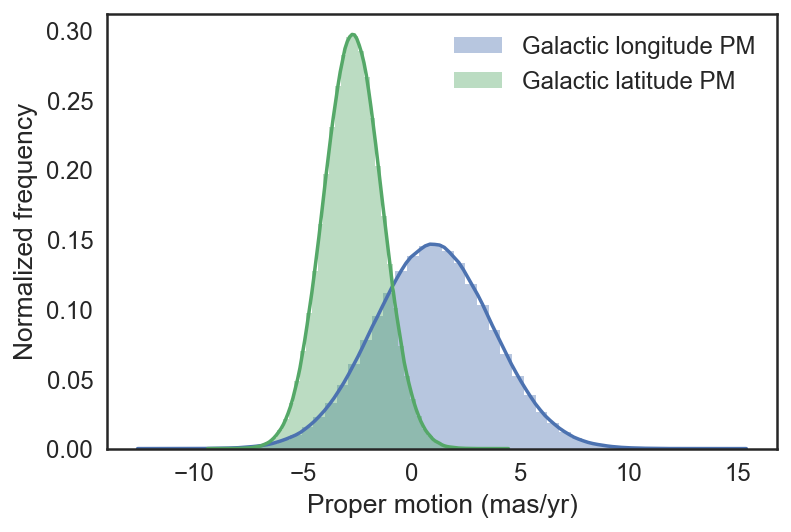

In [8]:
# plot PM distributions in galactic coordinates and print median + rms
ax = sns.distplot(c_new.pm_l, label='Galactic longitude PM')
sns.distplot(c_new.pm_b, label='Galactic latitude PM')
ax.legend()
ax.set_xlabel('Proper motion (mas/yr)')
ax.set_ylabel('Normalized frequency')
print('Median galactic longitude PM: {:.5f}'.format(np.median(c_new.pm_l)))
print('Median galactic latitude PM: {:.5f}'.format(np.median(c_new.pm_b)))
print('RMS galactic longitude PM: {:.5f}'.format(np.std(c_new.pm_l)))
print('RMS galactic latitude PM: {:.5f}'.format(np.std(c_new.pm_b)))

Median RA PM: 1.52319 mas / yr
Median Dec PM: -2.28355 mas / yr
RMS RA PM: 0.98341 mas / yr
RMS Dec PM: 1.62508 mas / yr


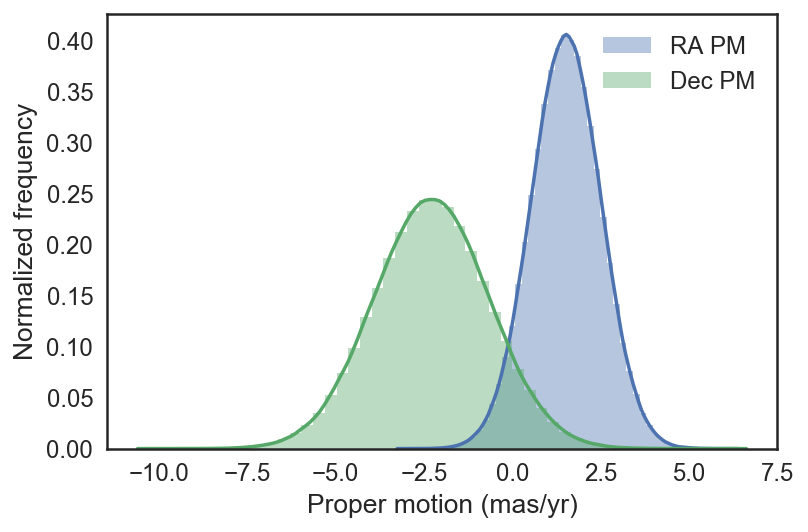

In [9]:
# plot PM distributions in ICRS coordinates and print median + rms
ax = sns.distplot(c_new_icrs.pm_ra, label='RA PM')
sns.distplot(c_new_icrs.pm_dec, label='Dec PM')
ax.legend()
ax.set_xlabel('Proper motion (mas/yr)')
ax.set_ylabel('Normalized frequency')
print('Median RA PM: {:.5f}'.format(np.median(c_new_icrs.pm_ra)))
print('Median Dec PM: {:.5f}'.format(np.median(c_new_icrs.pm_dec)))
print('RMS RA PM: {:.5f}'.format(np.std(c_new_icrs.pm_ra)))
print('RMS Dec PM: {:.5f}'.format(np.std(c_new_icrs.pm_dec)))

### d) what is the median and rms for their observed radial velocity?

Median radial velocity: -107.75269 km / s
RMS radial velocity: 90.68151 km / s


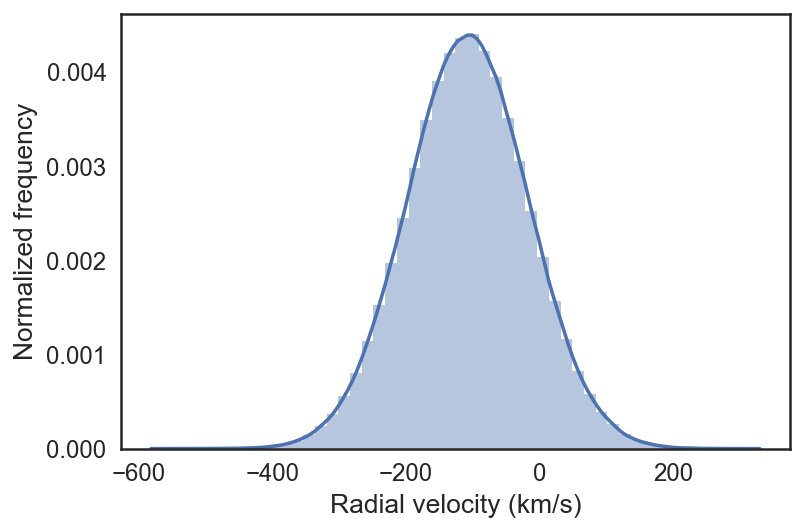

In [10]:
ax = sns.distplot(c_new.radial_velocity)
ax.set_xlabel('Radial velocity (km/s)')
ax.set_ylabel('Normalized frequency')
print('Median radial velocity: {:.5f}'.format(np.median(c_new.radial_velocity)))
print('RMS radial velocity: {:.5f}'.format(np.std(c_new.radial_velocity)))